In [1]:
import geometric_qrm
import numpy as np
import os

In [4]:
def clear_folder():
    for filename in os.listdir("circuits"):
        os.remove("circuits/" + filename)

In [7]:
# clear_folder()

In [2]:
M_MAX = 9

for m in range(1, M_MAX + 1):
    for r in range(m + 1):
        for q in range(r):
            # we have constructed valid codes, now choose k, KSize
            
            for k in range(2, (m - (q + 1)) // r + 1):
                for KSize in range(0, m + 1):
                    circ = geometric_qrm.make_code(k, KSize, m, q, r)
                    
                    if circ:
                        with open(f"circuits/{k}_{KSize}_{m}_{q}_{r}.tex", "w") as f:
                            f.write(circ)

In [15]:
# build graph using qbs as labels

import networkx as nx
import matplotlib.pyplot as plt

m = 6
q = 0
r = 2

spec_circuit = geometric_qrm.compute_logic(2, range(1, m + 1), m, q, r)

qbs = geometric_qrm.indexed_logical_qubits(m, q, r)

G = nx.Graph()

for q in list(qbs.values())[7:]:
    G.add_node(q)

for edge in spec_circuit:
    G.add_edge(edge[0], edge[1])
    G.add_edge(edge[1], edge[2])
    G.add_edge(edge[0], edge[2])

In [3]:
all_cliques= nx.enumerate_all_cliques(G)
triad_cliques=[x for x in all_cliques if len(x)==3 ]

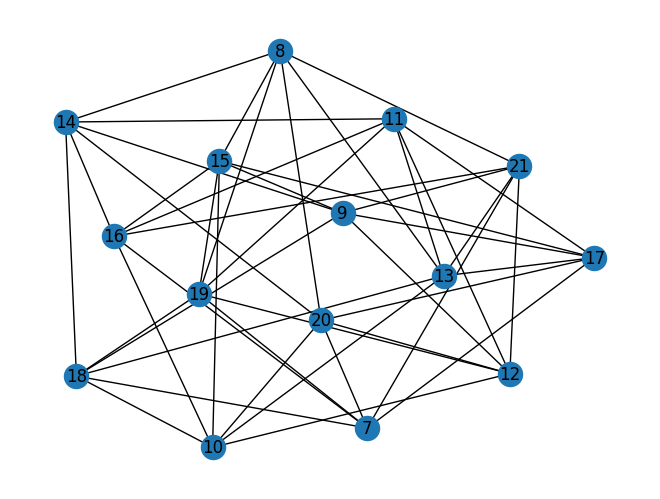

In [16]:
# visualize G
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

In [17]:
spec_circuit[0]

[20, 7, 17]

In [26]:
np.random.randint(0, 2)

0

In [29]:
potato = set()
potato.add(2)
potato

{2}

In [30]:
set([1, 2, 3])

{1, 2, 3}

In [47]:
sorted([ 2, 1])

[1, 2]

In [50]:
[1, 2][0:2]

[1, 2]

In [51]:
# iterate through 6!
# sort with ab | cd | ef (a < b, c < d, e < f)
# select a pairing and ensure that we never see multiple ab pairs

import itertools

seen_sets = set()

keep_perm = []
for all_perm in itertools.permutations(range(1, 9)):
    ab = tuple(sorted([all_perm[0:3]]))
    cd = tuple(sorted([all_perm[3:6]]))
    ef = tuple(sorted([all_perm[6:9]]))
    
    if ab in seen_sets or cd in seen_sets or ef in seen_sets:
        continue
    
    seen_sets.add(ab)
    seen_sets.add(cd)
    seen_sets.add(ef)
    keep_perm.append(all_perm)

TypeError: unhashable type: 'list'

In [45]:
keep_perm

[(1, 2, 3, 4, 5, 6),
 (1, 3, 2, 5, 4, 6),
 (1, 4, 2, 6, 3, 5),
 (1, 5, 2, 4, 3, 6),
 (1, 6, 2, 3, 4, 5)]

In [38]:
keep = set()
discard = set()

keep = set(spec_circuit[0])

prev_size = 0

while len(keep) + len(discard) > prev_size:
    prev_size = len(keep) + len(discard)
    for ccz in spec_circuit[1:]:
        # for each subsequent ccz, 
        # if it has no overlap with keep, try and keep it
        if len(keep.intersection(ccz)) == 0:
            keep.union(set(ccz))
        
        # if it has any overlap with keep and no overlap with discard, we need to make sure it has overlap with discard
        
        elif len(keep.intersection(ccz)) > 0 and len(discard.intersection(ccz)) == 0:
            # choose a node at random in ccz but not in keep to discard
            need_to_discard = list(set(ccz).difference(keep))
            
            discard.add(need_to_discard[np.random.randint(0, len(need_to_discard))])
    
        


In [40]:
keep

{7, 17, 20}

In [9]:
keep = set()
discard = set()

for node in qbs.values():
    # add node to keep
    keep.add(node)
    
    presence = 0
    for ccz in spec_circuit:
        if len(set(ccz).intersection(keep)) == 3:
            presence += 1
    
    if presence > 1:
        keep.remove(node)
        discard.add(node)
        

In [10]:
discard

{16, 17, 18, 19, 20, 21}

In [ ]:
oldset = []
newset = []



In [62]:
keep_cliques = []
for clique3 in triad_cliques:    
    if all([clique3[i] in G for i in range(3)]):
        keep_cliques.append(clique3)
        # delete clique3 from G
        G.remove_nodes_from(clique3)

In [63]:
len(keep_cliques)

5

In [65]:
keep_cliques

[[7, 16, 21], [8, 14, 20], [9, 15, 17], [10, 13, 18], [11, 12, 19]]

In [64]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [57]:
qbs

{(1, 2, 3): 1,
 (1, 2, 4): 2,
 (1, 2, 5): 3,
 (1, 2, 6): 4,
 (1, 2, 7): 5,
 (1, 2, 8): 6,
 (1, 2, 9): 7,
 (1, 3, 4): 8,
 (1, 3, 5): 9,
 (1, 3, 6): 10,
 (1, 3, 7): 11,
 (1, 3, 8): 12,
 (1, 3, 9): 13,
 (1, 4, 5): 14,
 (1, 4, 6): 15,
 (1, 4, 7): 16,
 (1, 4, 8): 17,
 (1, 4, 9): 18,
 (1, 5, 6): 19,
 (1, 5, 7): 20,
 (1, 5, 8): 21,
 (1, 5, 9): 22,
 (1, 6, 7): 23,
 (1, 6, 8): 24,
 (1, 6, 9): 25,
 (1, 7, 8): 26,
 (1, 7, 9): 27,
 (1, 8, 9): 28,
 (2, 3, 4): 29,
 (2, 3, 5): 30,
 (2, 3, 6): 31,
 (2, 3, 7): 32,
 (2, 3, 8): 33,
 (2, 3, 9): 34,
 (2, 4, 5): 35,
 (2, 4, 6): 36,
 (2, 4, 7): 37,
 (2, 4, 8): 38,
 (2, 4, 9): 39,
 (2, 5, 6): 40,
 (2, 5, 7): 41,
 (2, 5, 8): 42,
 (2, 5, 9): 43,
 (2, 6, 7): 44,
 (2, 6, 8): 45,
 (2, 6, 9): 46,
 (2, 7, 8): 47,
 (2, 7, 9): 48,
 (2, 8, 9): 49,
 (3, 4, 5): 50,
 (3, 4, 6): 51,
 (3, 4, 7): 52,
 (3, 4, 8): 53,
 (3, 4, 9): 54,
 (3, 5, 6): 55,
 (3, 5, 7): 56,
 (3, 5, 8): 57,
 (3, 5, 9): 58,
 (3, 6, 7): 59,
 (3, 6, 8): 60,
 (3, 6, 9): 61,
 (3, 7, 8): 62,
 (3, 7, 9): 63,
 

In [56]:
for i in keep_cliques:
    for j in keep_cliques:
        # intersect
        sect = len(set(i).intersection(set(j)))

        if sect > 0 and sect < 3:
            print(i, j)


# keep_cliques

In [35]:
len(keep_cliques)

25

In [ ]:
import networkx as nx



tri=nx.triangles(g)



In [3]:
geometric_qrm.compute_logic(4, range(1, 5 + 1), 2, 0, 1)

AssertionError: 

In [3]:
geometric_qrm.make_code(4, 5, 2, 0, 1)

KeyError: (5,)

In [4]:
if not []:
    print("ye")

ye
